# Moral Foundation Theory

In [1]:
import pandas as pd

In [2]:
# load csv file from ../../data/axis/mft_raw.csv
df = pd.read_csv('../../data/axis/mft_raw.csv')

# print the first 5 rows of the dataframe
print(df.head())

         word    care_p  fairness_p  loyalty_p  authority_p  sanctity_p  \
0     brought  0.180000    0.114286   0.080000     0.096552    0.053333   
1       close  0.073359    0.031373   0.115385     0.077220    0.084821   
2      marine  0.029851    0.011765   0.043860     0.009434    0.000000   
3      campus  0.045455    0.090909   0.048780     0.046875    0.081633   
4  provincial  0.088235    0.000000   0.066667     0.193548    0.000000   

   care_sent  fairness_sent  loyalty_sent  authority_sent  sanctity_sent  
0  -0.235404      -0.310015     -0.099783       -0.402207      -0.132550  
1   0.136189      -0.043962     -0.011387       -0.258195       0.100926  
2  -0.392250      -0.025800     -0.132460        0.000000       0.000000  
3   0.360900      -0.505238     -0.271150        0.318133      -0.300225  
4  -0.381800       0.000000     -0.263350       -0.103800       0.000000  


In [3]:
# replace "_p" to "_virtue" and "_sent" to "_vice"
df.columns = df.columns.str.replace('_p', '_vice')
df.columns = df.columns.str.replace('_sent', '_virtue')

In [4]:
df

,word,care_vice,fairness_vice,loyalty_vice,authority_vice,sanctity_vice,care_virtue,fairness_virtue,loyalty_virtue,authority_virtue,sanctity_virtue
0,brought,0.180000,0.114286,0.080000,0.096552,0.053333,-0.235404,-0.310015,-0.099783,-0.402207,-0.132550
1,close,0.073359,0.031373,0.115385,0.077220,0.084821,0.136189,-0.043962,-0.011387,-0.258195,0.100926
2,marine,0.029851,0.011765,0.043860,0.009434,0.000000,-0.392250,-0.025800,-0.132460,0.000000,0.000000
3,campus,0.045455,0.090909,0.048780,0.046875,0.081633,0.360900,-0.505238,-0.271150,0.318133,-0.300225
4,provincial,0.088235,0.000000,0.066667,0.193548,0.000000,-0.381800,0.000000,-0.263350,-0.103800,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3265,outsiders,0.150000,0.142857,0.444444,0.375000,0.000000,-0.466667,0.000000,-0.132300,-0.202056,0.000000
3266,border,0.123377,0.085000,0.063457,0.093023,0.081911,-0.175247,-0.219750,-0.094114,-0.091685,-0.078121
3267,implement,0.121951,0.163636,0.190476,0.166667,0.056604,-0.111020,0.104767,0.052263,0.232813,0.274167
3268,recruit,0.050000,0.000000,0.066667,0.208333,0.105263,0.000000,0.000000,0.318200,0.250440,0.187000


In [5]:
df['highest_value_col'] = df.iloc[:, 1:].idxmax(axis=1)

In [6]:
def calculate_importance(row):
    highest_value_col = row['highest_value_col']
    highest_value = row[highest_value_col]
    
    # Determine if we're dealing with a virtue or a vice based on the highest value column
    value_type = 'virtue' if 'virtue' in highest_value_col else 'vice'
    
    # Filter columns by the determined value type
    related_values = [row[col] for col in df.columns if value_type in col]
    
    # Calculate the average of the related values, excluding the highest value
    average_of_related_values = sum(related_values) / len(related_values)
    
    # The importance metric is the difference between the highest value and the average of related values
    importance = highest_value - average_of_related_values
    return importance

# Apply the function to each row in the DataFrame to calculate the importance metric
df['importance'] = df.apply(calculate_importance, axis=1)

df



,word,care_vice,fairness_vice,loyalty_vice,authority_vice,sanctity_vice,care_virtue,fairness_virtue,loyalty_virtue,authority_virtue,sanctity_virtue,highest_value_col,importance
0,brought,0.180000,0.114286,0.080000,0.096552,0.053333,-0.235404,-0.310015,-0.099783,-0.402207,-0.132550,care_vice,0.075166
1,close,0.073359,0.031373,0.115385,0.077220,0.084821,0.136189,-0.043962,-0.011387,-0.258195,0.100926,care_virtue,0.151475
2,marine,0.029851,0.011765,0.043860,0.009434,0.000000,-0.392250,-0.025800,-0.132460,0.000000,0.000000,loyalty_vice,0.024878
3,campus,0.045455,0.090909,0.048780,0.046875,0.081633,0.360900,-0.505238,-0.271150,0.318133,-0.300225,care_virtue,0.440416
4,provincial,0.088235,0.000000,0.066667,0.193548,0.000000,-0.381800,0.000000,-0.263350,-0.103800,0.000000,authority_vice,0.123858
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,outsiders,0.150000,0.142857,0.444444,0.375000,0.000000,-0.466667,0.000000,-0.132300,-0.202056,0.000000,loyalty_vice,0.221984
3266,border,0.123377,0.085000,0.063457,0.093023,0.081911,-0.175247,-0.219750,-0.094114,-0.091685,-0.078121,care_vice,0.034023
3267,implement,0.121951,0.163636,0.190476,0.166667,0.056604,-0.111020,0.104767,0.052263,0.232813,0.274167,sanctity_virtue,0.163569
3268,recruit,0.050000,0.000000,0.066667,0.208333,0.105263,0.000000,0.000000,0.318200,0.250440,0.187000,loyalty_virtue,0.167072


In [7]:
def transform_df_to_dict(df, top_n=5):
    """
    Transforms a DataFrame into a dictionary with words categorized by their highest value columns,
    and sorts them by their associated values, returning only the top N words for each category.

    Parameters:
    - df: pandas DataFrame with columns including 'word', 'highest_value_col', and various virtue/vice columns.
    - top_n: The number of top words to return for each category based on their values.

    Returns:
    - A dictionary with categories as keys and lists of top N words (sorted by their values) as values.
    """
    transformed_data = {}

    for index, row in df.iterrows():
        highest_value_col = row["highest_value_col"]
        domain, value_type = highest_value_col.rsplit('_', 1)  # Split into the domain and virtue/vice
        value = row[highest_value_col]  # Get the value associated with the highest_value_col

        # Ensure the domain exists in the dictionary
        if domain not in transformed_data:
            transformed_data[domain] = {"virtue": [], "vice": []}
        
        # Append the word along with its value to the list
        transformed_data[domain][value_type].append((row["word"], value))
    
    # Sort and trim the lists to top N based on their associated values
    for domain in transformed_data:
        for value_type in ["virtue", "vice"]:
            transformed_data[domain][value_type].sort(key=lambda x: x[1], reverse=True)  # Sort by value, descending
            transformed_data[domain][value_type] = [word for word, _ in transformed_data[domain][value_type][:top_n]]  # Keep only top N words

    return transformed_data

# Demonstrating the function with the existing DataFrame and specifying top N words
foundation_dict = transform_df_to_dict(df, top_n=40)  # Using top_n=1 for demonstration

In [8]:
foundation_dict

{'care': {'virtue': ['celebrating',
   'liberty',
   'outstanding',
   'brave',
   'loyalty',
   'approval',
   'advised',
   'arriving',
   'wise',
   'thank',
   'encourage',
   'success',
   'bureaus',
   'remarkable',
   'pride',
   'nice',
   'bilateral',
   'solidarity',
   'feminist',
   'respected',
   'resolutions',
   'virtues',
   'promote',
   'respect',
   'promoting',
   'dream',
   'teaching',
   'backers',
   'accepted',
   'determination',
   'free',
   'chamber',
   'womens',
   'spiritual',
   'solar',
   'read',
   'science',
   'obligations',
   'capitalism',
   'benefited'],
  'vice': ['tortured',
   'pocket',
   'cruel',
   'harsh',
   'sexually',
   'persecution',
   'hostility',
   'income',
   'stranded',
   'knife',
   'imprisonment',
   'drivers',
   'killed',
   'punishments',
   'attacked',
   'suicide',
   'assassination',
   'villagers',
   'mans',
   'subjected',
   'atrocities',
   'hurt',
   'waste',
   'disabled',
   'subsidy',
   'casualties',
   's

In [9]:
# count the number of words in each foundation
for domain, values in foundation_dict.items():
    print(f"{domain}:")
    print(f"Virtue: {len(values['virtue'])}")
    print(f"Vice: {len(values['vice'])}")
    print()

care:
Virtue: 40
Vice: 40

loyalty:
Virtue: 40
Vice: 40

authority:
Virtue: 40
Vice: 40

fairness:
Virtue: 40
Vice: 40

sanctity:
Virtue: 40
Vice: 40



In [10]:
# save the foundation_dict to a json file
import json

with open('../../data/axis/foundation_dict.json', 'w') as f:
    json.dump(foundation_dict, f)


# Check existence of the words in the Media Frames Corpus

In [11]:
immigration_path = "../../data/mfc/immigration_labeled.json"
deathpenalty_path = "../../data/mfc/deathpenalty_labeled.json"
guncontrol_path = "../../data/mfc/guncontrol_labeled.json"
samesex_path = "../../data/mfc/samesex_labeled.json"
tobacco_path = "../../data/mfc/tobacco_labeled.json"
frames_code = "../../data/mfc/codes.json"

In [12]:
# read unlabeled data
import json

# read labeled data
with open(immigration_path) as f:
    immigration = json.load(f)

with open(deathpenalty_path) as f:
    deathpenalty = json.load(f)

with open(guncontrol_path) as f:
    guncontrol = json.load(f)

with open(samesex_path) as f:
    samesex = json.load(f)

with open(tobacco_path) as f:
    tobacco = json.load(f)

# read frames
with open(frames_code) as f:
    codes = json.load(f)

In [13]:
def get_frame_name(code):
    if "." not in str(code):
        return codes[str(code) + ".2"]
    return codes[code]

def get_tone_name(code):
    if code == "17":
        return "Pro"
    elif code == "18":
        return "Neutral"
    elif code == "19":
        return "Anti"
    else:
        return codes[code]


In [14]:
# generate statistics count
print("immigration data count: ", len(immigration))
print("deathpenalty data count: ", len(deathpenalty))
print("guncontrol data count: ", len(guncontrol))
print("samesex data count: ", len(samesex))
print("tobacco data count: ", len(tobacco))

immigration data count:  6757
deathpenalty data count:  6398
guncontrol data count:  6689
samesex data count:  10583
tobacco data count:  5274


In [15]:
def process_json(json_path):
    articles = []

    # Load the JSON file
    with open(json_path) as f:
        labeled = json.load(f)
    
    # Loop through labeled data
    for idx, article in labeled.items():
        # preprocess text
        text = article["text"]

        # replace \n, \t, \r with space
        text = text.replace("\n", " ").replace("\t", " ").replace("\r", " ")

        articles.append(text)
    
    return articles

# Call the function for each JSON object
immigration_articles = process_json(immigration_path)
deathpenalty_articles = process_json(deathpenalty_path)
guncontrol_articles = process_json(guncontrol_path)
samesex_articles = process_json(samesex_path)
tobacco_articles = process_json(tobacco_path)

In [16]:
immigration_articles

['IMM-10005  PRIMARY  Immigrants without HOPE need help entering college  Anxiety gripped Jose Alvarado in third-period calculus class at North Atlanta High School. It mounted as students went around the room telling Mrs. Brooks where they would go to college: Emory. Georgia Tech. University of Georgia.  "All I could say was, \'I\'m planning to see if I can get into a college because of my situation,\' " he recalled.  Alvarado earned a 3.5 grade-point average and 1110 on the SAT. He led the soccer team and was in the National Honor Society and the Latin and Spanish clubs.  Until recently, though, college seemed out of reach. That\'s because when Jose Alvarado was four months old, his parents broke immigration law by bringing him from Mexico to the United States without permission.  By all outward appearances, Alvarado is as American as any other 17-year-old. He listens to the Dave Matthews Band and Tupac Shakur, watches "The Simpsons" and "MTV."  But in the eyes of the law, he is an il

In [17]:
save_dict = {
    "articles": immigration_articles
}

# save to json
with open('../../data/mfc/articles.json', 'w') as f:
    json.dump(save_dict, f)

# Use Counter for each frame and word

In [18]:
# Count the tf
from collections import Counter

def count_tf(articles):
    # Tokenize the text into words
    words = " ".join(articles).split()
    
    # Count the frequency of each word
    word_freq = Counter(words)
    
    return word_freq

word_freq = count_tf(immigration_articles)

In [19]:
word_freq

Counter({'the': 83309,
         'to': 49358,
         'of': 44929,
         'and': 37959,
         'a': 36581,
         'in': 32981,
         'for': 18088,
         'that': 17755,
         'is': 12641,
         'on': 12455,
         'The': 11967,
         'are': 8989,
         'immigration': 8826,
         'with': 8824,
         'from': 8734,
         'who': 8550,
         'was': 8180,
         'by': 8105,
         'said': 8056,
         'as': 8052,
         'have': 7854,
         'at': 7107,
         'an': 6895,
         'be': 6875,
         'PRIMARY': 6759,
         'immigrants': 6677,
         'has': 6465,
         'they': 6055,
         'not': 6050,
         'he': 5984,
         'their': 5897,
         'his': 5602,
         'illegal': 5558,
         'would': 5244,
         'it': 5234,
         'U.S.': 4547,
         'were': 4525,
         'or': 4479,
         'will': 4371,
         'this': 4284,
         'United': 4234,
         'more': 3835,
         'about': 3822,
         'had':

## Now check how often each of the eMFT words appear in the Media Frames Corpus

In [20]:
# use foundation_dict
for domain, values in foundation_dict.items():
    print(domain)
    for value_type in ["virtue", "vice"]:
        print("  ", value_type)
        for word in values[value_type]:
            print("    ", word, word_freq[word])

care
   virtue
     celebrating 16
     liberty 23
     outstanding 26
     brave 18
     loyalty 8
     approval 112
     advised 21
     arriving 122
     wise 8
     thank 10
     encourage 89
     success 67
     bureaus 4
     remarkable 22
     pride 18
     nice 24
     bilateral 14
     solidarity 12
     feminist 3
     respected 21
     resolutions 11
     virtues 3
     promote 63
     respect 65
     promoting 22
     dream 81
     teaching 34
     backers 22
     accepted 60
     determination 27
     free 287
     chamber 20
     womens 0
     spiritual 11
     solar 3
     read 146
     science 60
     obligations 18
     capitalism 3
     benefited 18
   vice
     tortured 28
     pocket 11
     cruel 18
     harsh 75
     sexually 18
     persecution 106
     hostility 22
     income 116
     stranded 16
     knife 5
     imprisonment 16
     drivers 62
     killed 228
     punishments 3
     attacked 47
     suicide 40
     assassination 3
     villagers 5
     mans 0

# Analyse the frameaxis value

I've calculated the frameaxis value (bias and intensity) for the whole labeled MFC dataset. Know I want to analyse if the value show some pattern in connection to the primary frame of the articles.

In [21]:
import pandas as pd
import json
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [22]:
# load frameaxis data

with open('../../data/frameaxis/mfc/frameaxis_contextualized_mft.pkl', 'rb') as f:
    frameaxis_df = pickle.load(f)

In [23]:
# load mfc data

mfc_df = pd.DataFrame(json.load(open("../../data/mfc/data_prepared.json")))

In [24]:
# merge df and frameaxis_df on article_id

df = mfc_df.merge(frameaxis_df, on='article_id')

In [25]:
drop_columns = ['text', 'Capacity and Resources',
       'Crime and Punishment', 'Cultural Identity', 'Economic',
       'External Regulation and Reputation', 'Fairness and Equality',
       'Health and Safety', 'Legality, Constitutionality, Jurisdiction',
       'Morality', 'Other', 'Policy Prescription and Evaluation', 'Political',
       'Public Sentiment', 'Quality of Life', 'Security and Defense',]

df = df.drop(columns=drop_columns)

In [26]:
df.head()

,article_id,document_frame,care_bias,care_intensity,loyalty_bias,loyalty_intensity,authority_bias,authority_intensity,fairness_bias,fairness_intensity,sanctity_bias,sanctity_intensity
0,Immigration1.0-10005,Quality of Life,0.046806,0.001429,-0.072163,0.004429,-0.120223,0.005293,-0.089829,0.003872,-0.100013,0.001405
1,Immigration1.0-10005,Quality of Life,0.033659,0.001912,-0.096215,0.002419,-0.124081,0.001463,-0.134707,0.006858,-0.106475,0.000591
2,Immigration1.0-10005,Quality of Life,-0.013455,0.005673,-0.187340,0.014931,-0.031740,0.006546,-0.003253,0.005017,-0.068036,0.002993
3,Immigration1.0-10005,Quality of Life,0.030489,0.000623,-0.134004,0.009003,-0.061839,0.004271,-0.006635,0.004705,-0.039451,0.005877
4,Immigration1.0-10005,Quality of Life,0.050968,0.001929,-0.141105,0.011773,-0.163692,0.007566,-0.144491,0.011913,-0.112075,0.001787


In [27]:
# group by document_frame

grouped = df.groupby('document_frame')

In [28]:
grouped["document_frame"].count()

document_frame
Capacity and Resources                        30746
Crime and Punishment                          92767
Cultural Identity                             89730
Economic                                      67985
External Regulation and Reputation            13179
Fairness and Equality                         28489
Health and Safety                             35242
Legality, Constitutionality, Jurisdiction    117694
Morality                                      11158
Other                                         28982
Policy Prescription and Evaluation            63272
Political                                    126324
Public Sentiment                              30972
Quality of Life                               75669
Security and Defense                          33817
Name: document_frame, dtype: int64

In [29]:
bias_columns = [
    "care_bias",
    "loyalty_bias",
    "authority_bias",
    "fairness_bias",
    "sanctity_bias",
]

intensity_columns = [
    "care_intensity",
    "loyalty_intensity",
    "authority_intensity",
    "fairness_intensity",
    "sanctity_intensity",
]

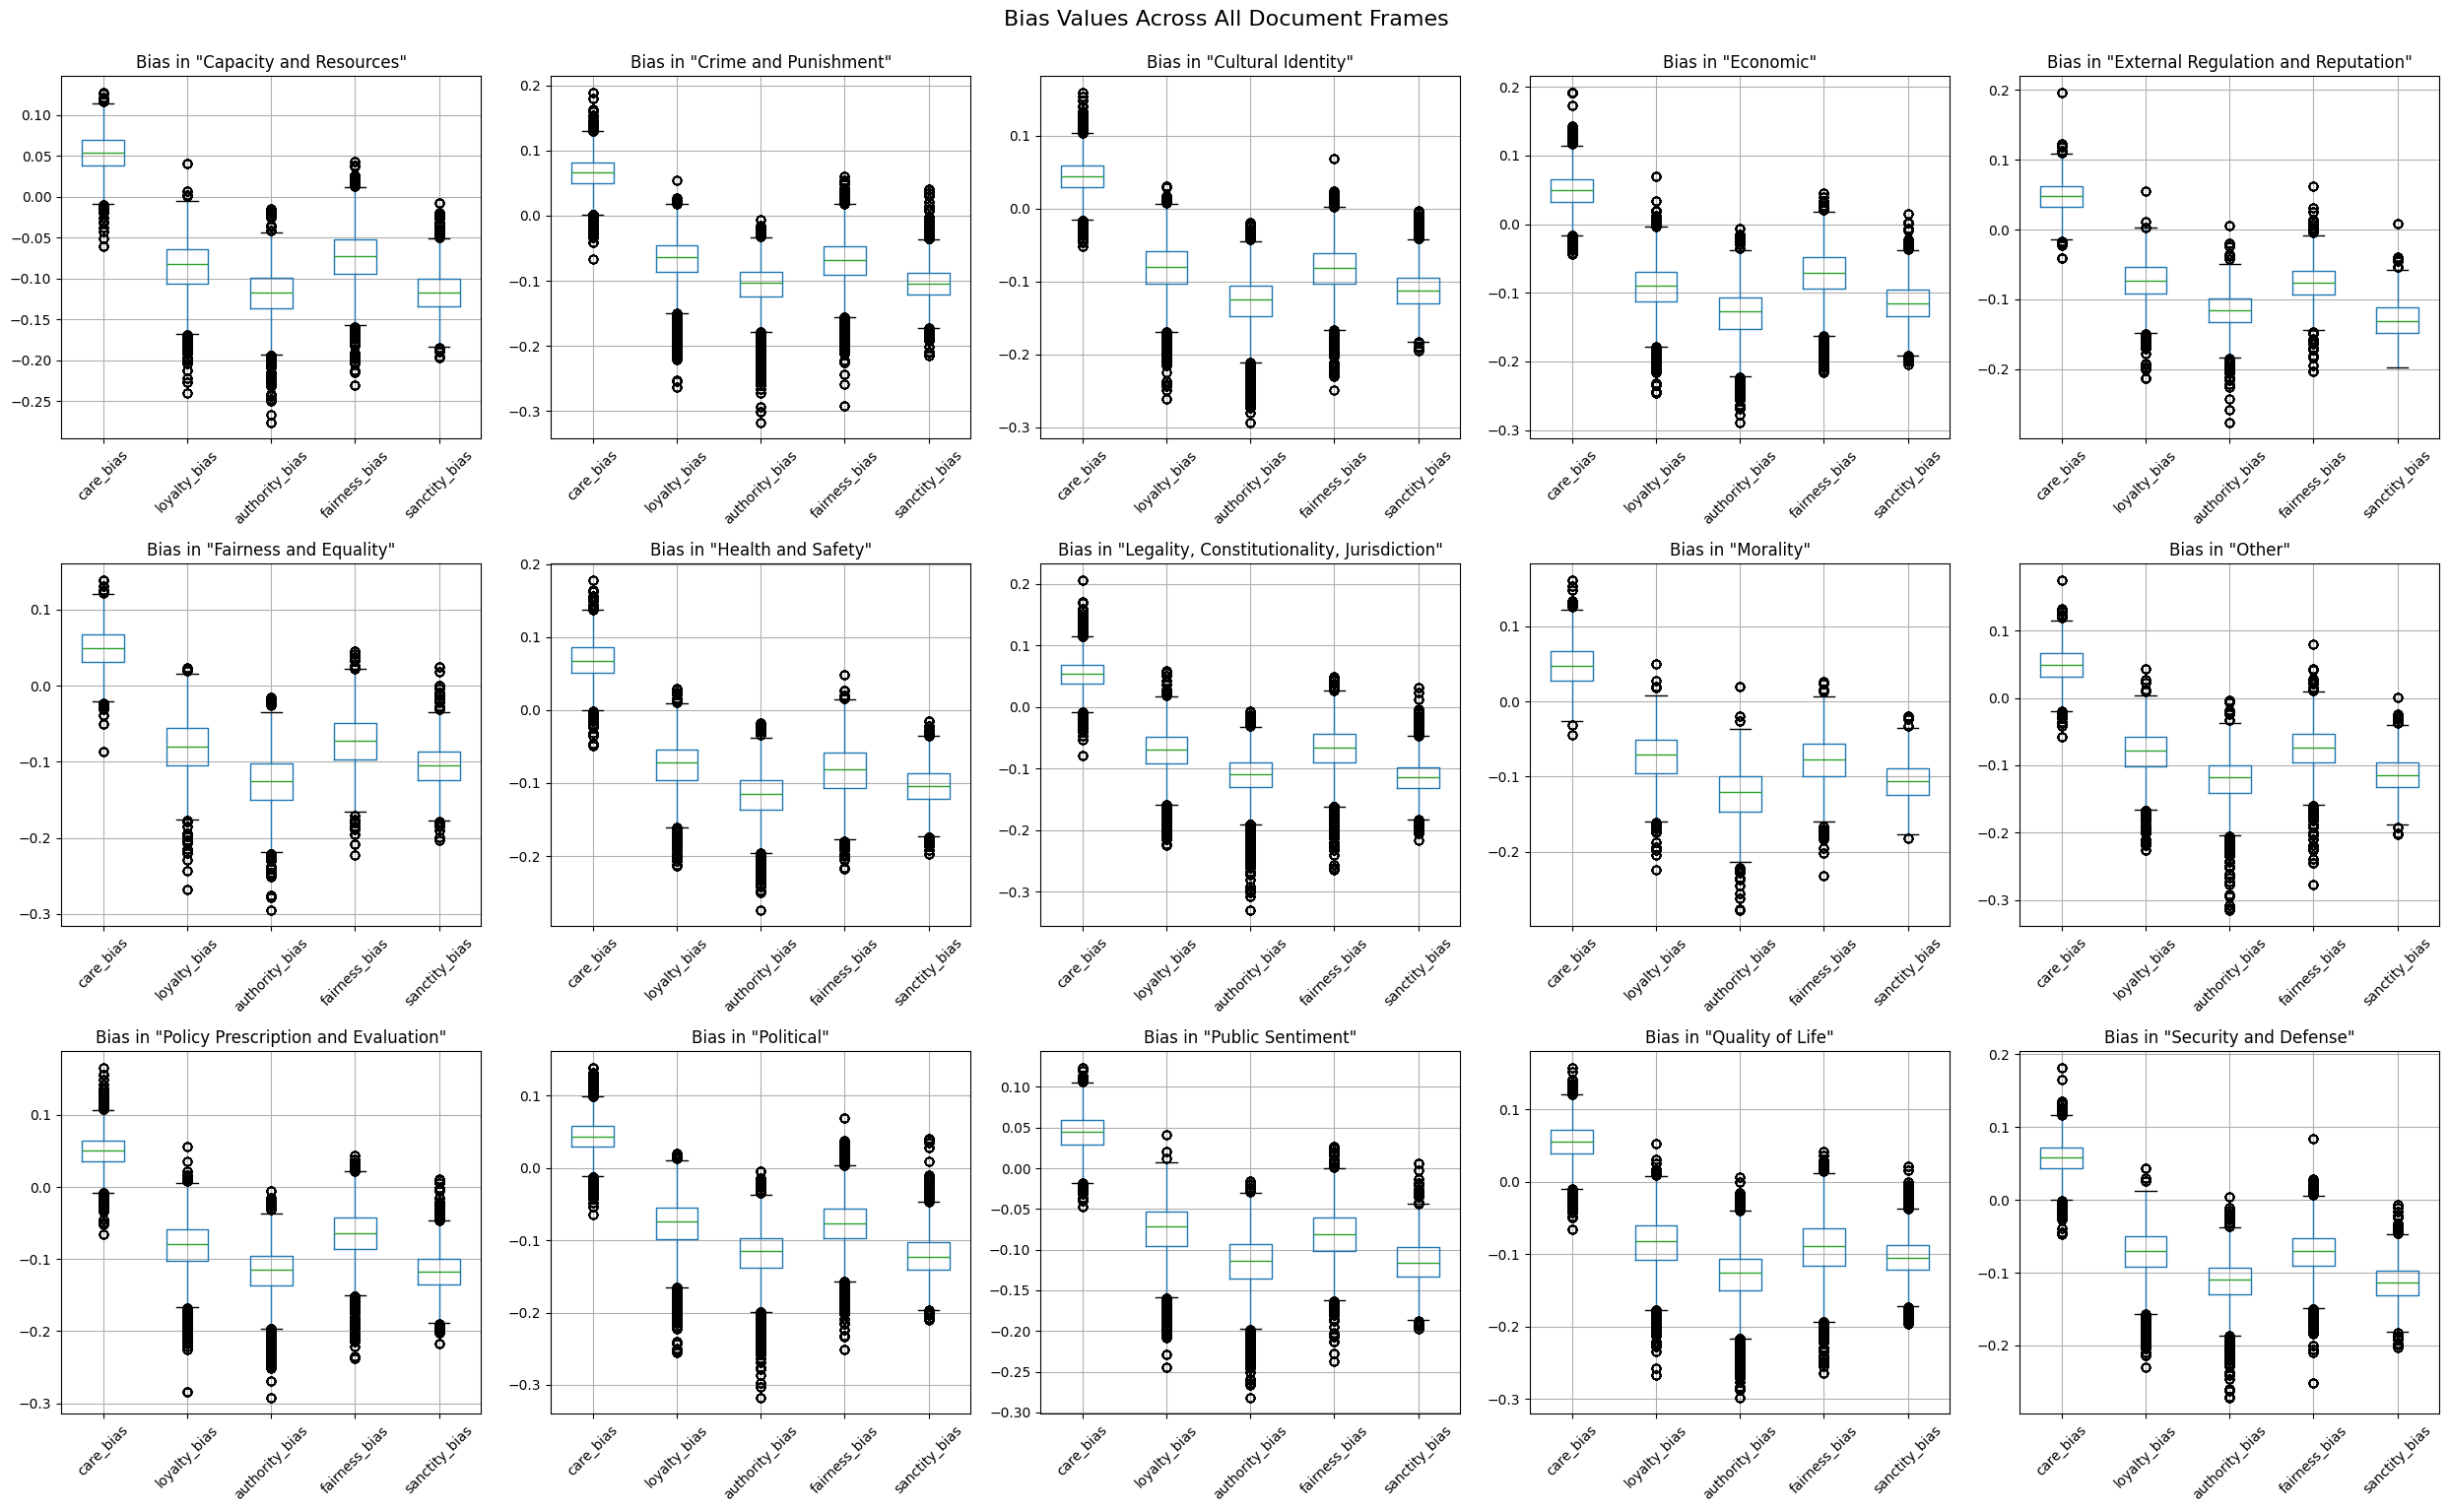

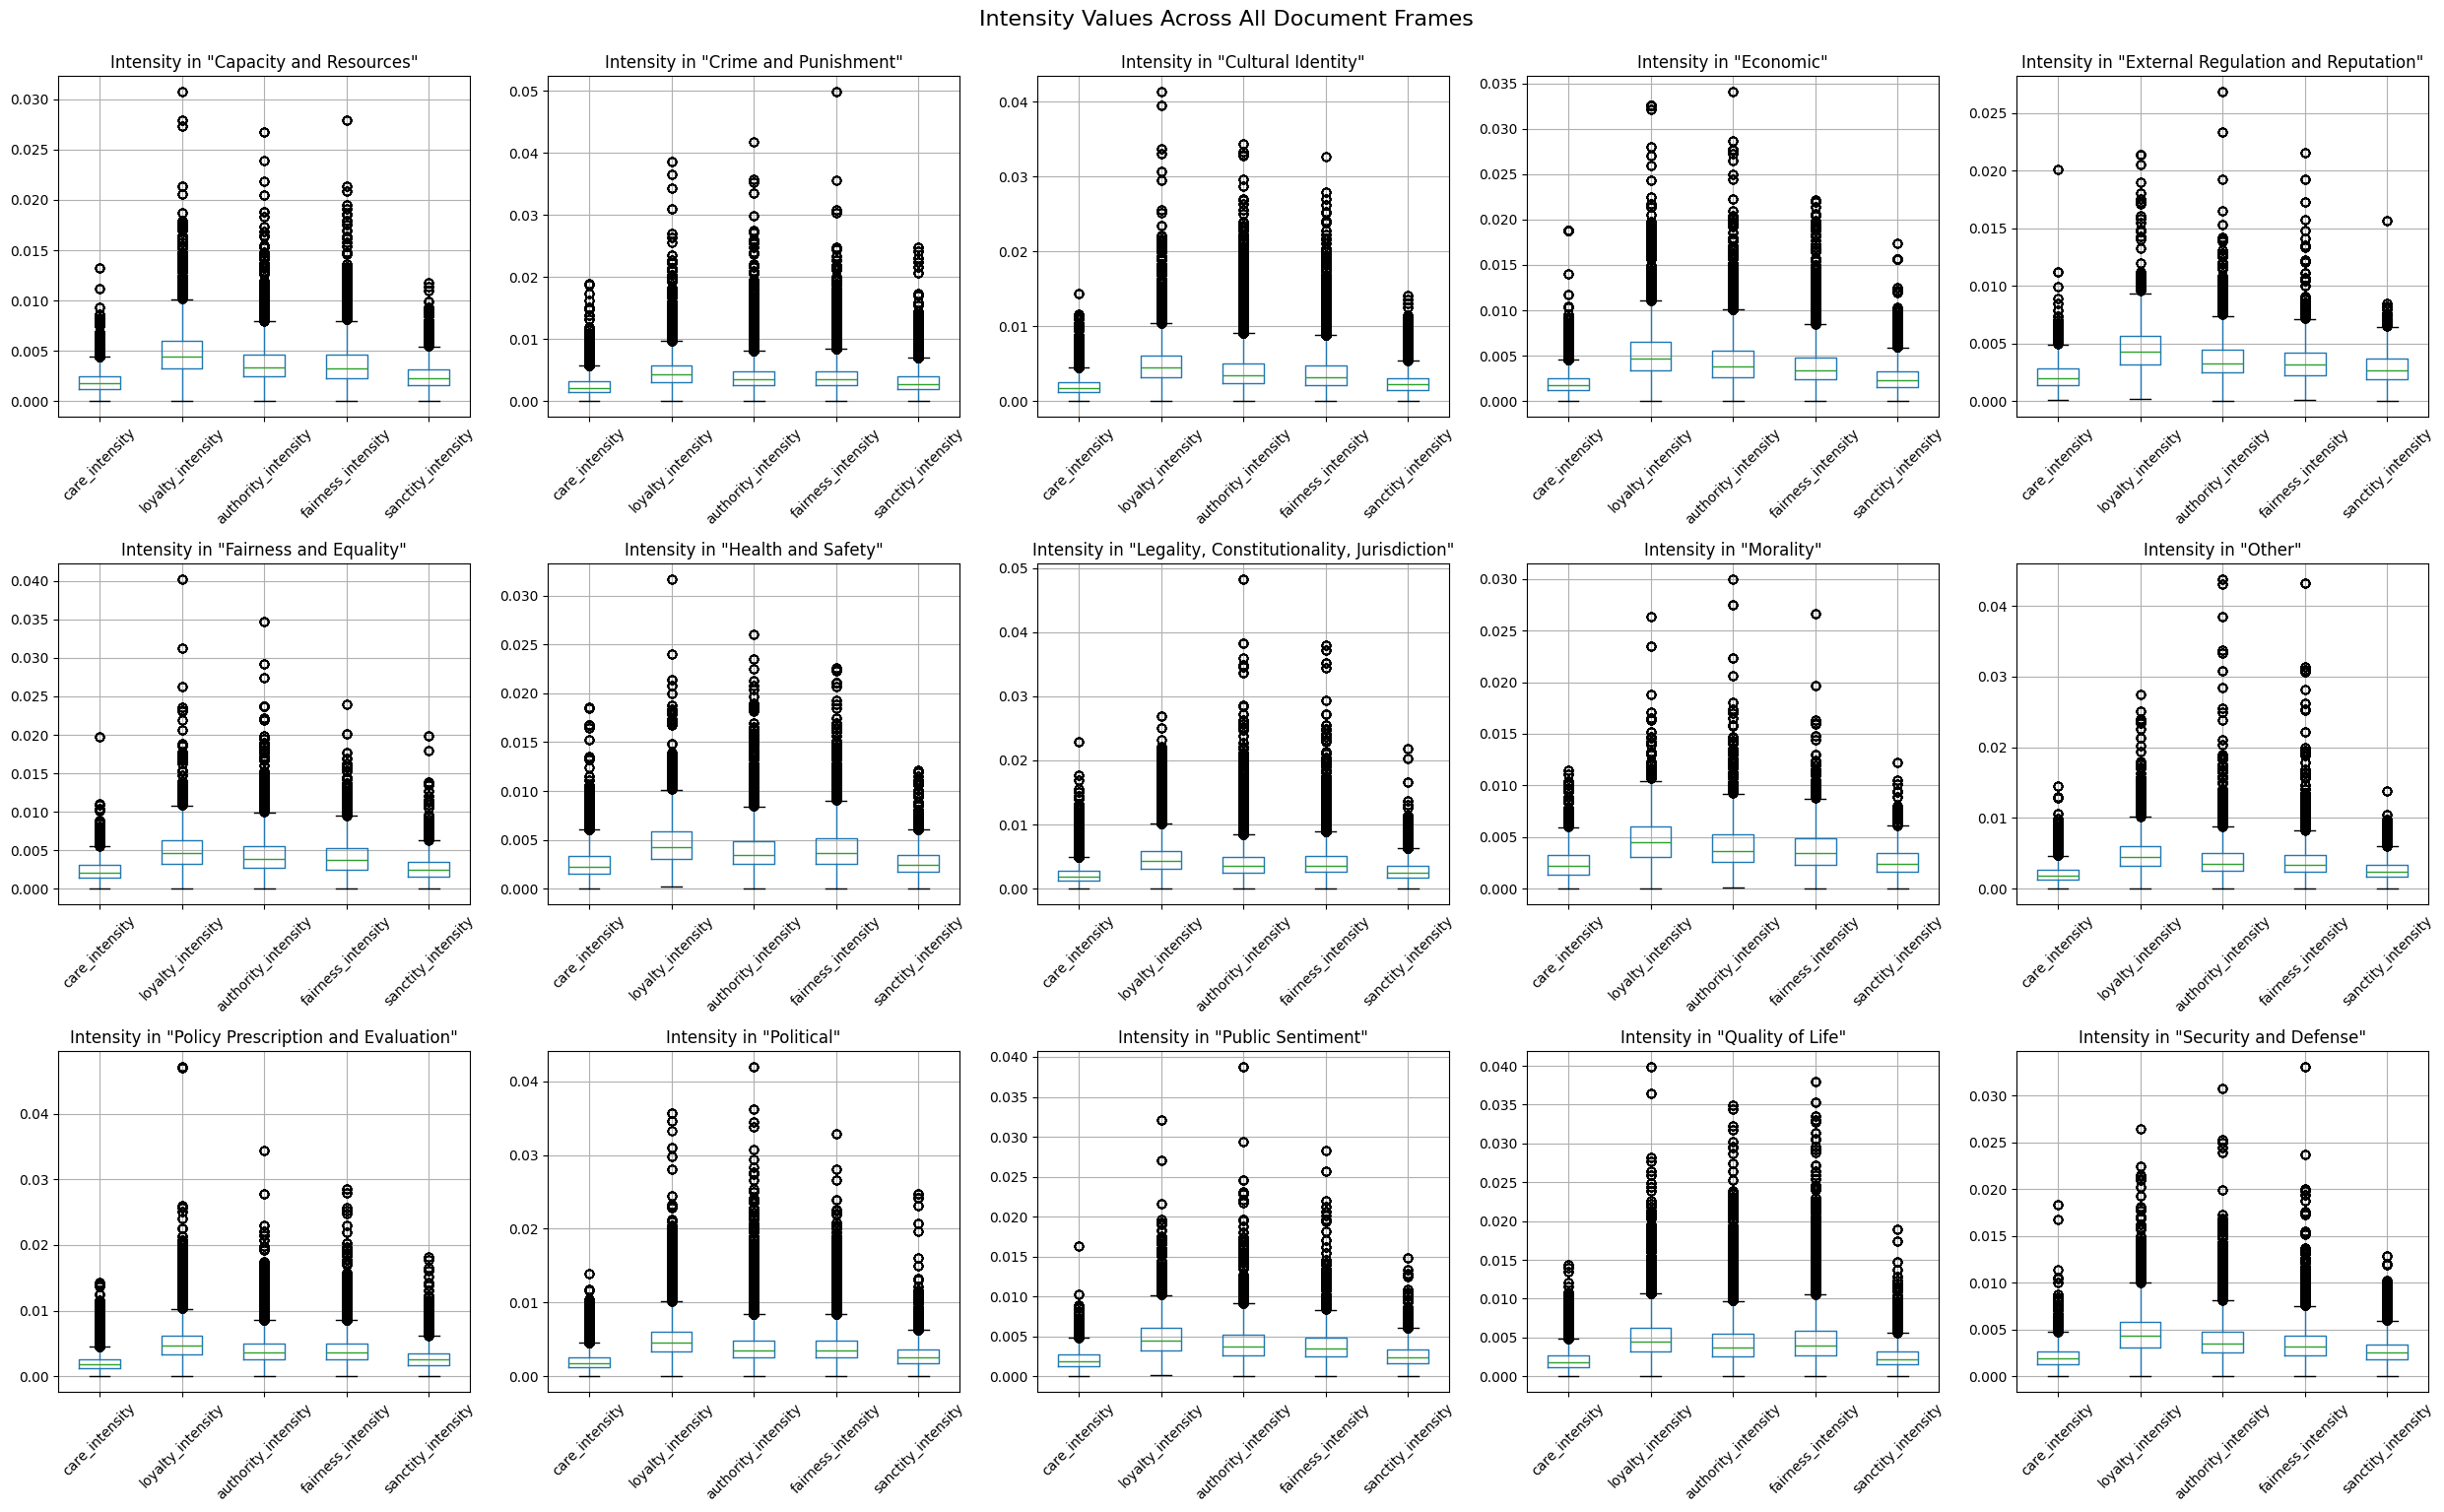

In [30]:
# Adjusting the plotting to accommodate all 15 frames
plt.figure(figsize=(25, 15))

# Plotting Bias Values for all 15 frames
for i, (frame, group) in enumerate(grouped, start=1):
    plt.subplot(3, 5, i)  # Adjusting the subplot grid to 3 rows by 5 columns
    group[bias_columns].boxplot()
    plt.title(f'Bias in "{frame}"')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Bias Values Across All Document Frames', y=1.02, fontsize=16)
plt.show()

plt.figure(figsize=(25, 15))

# Plotting Intensity Values for all 15 frames
for i, (frame, group) in enumerate(grouped, start=1):
    plt.subplot(3, 5, i)  # Adjusting the subplot grid to 3 rows by 5 columns
    group[intensity_columns].boxplot()
    plt.title(f'Intensity in "{frame}"')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Intensity Values Across All Document Frames', y=1.02, fontsize=16)
plt.show()

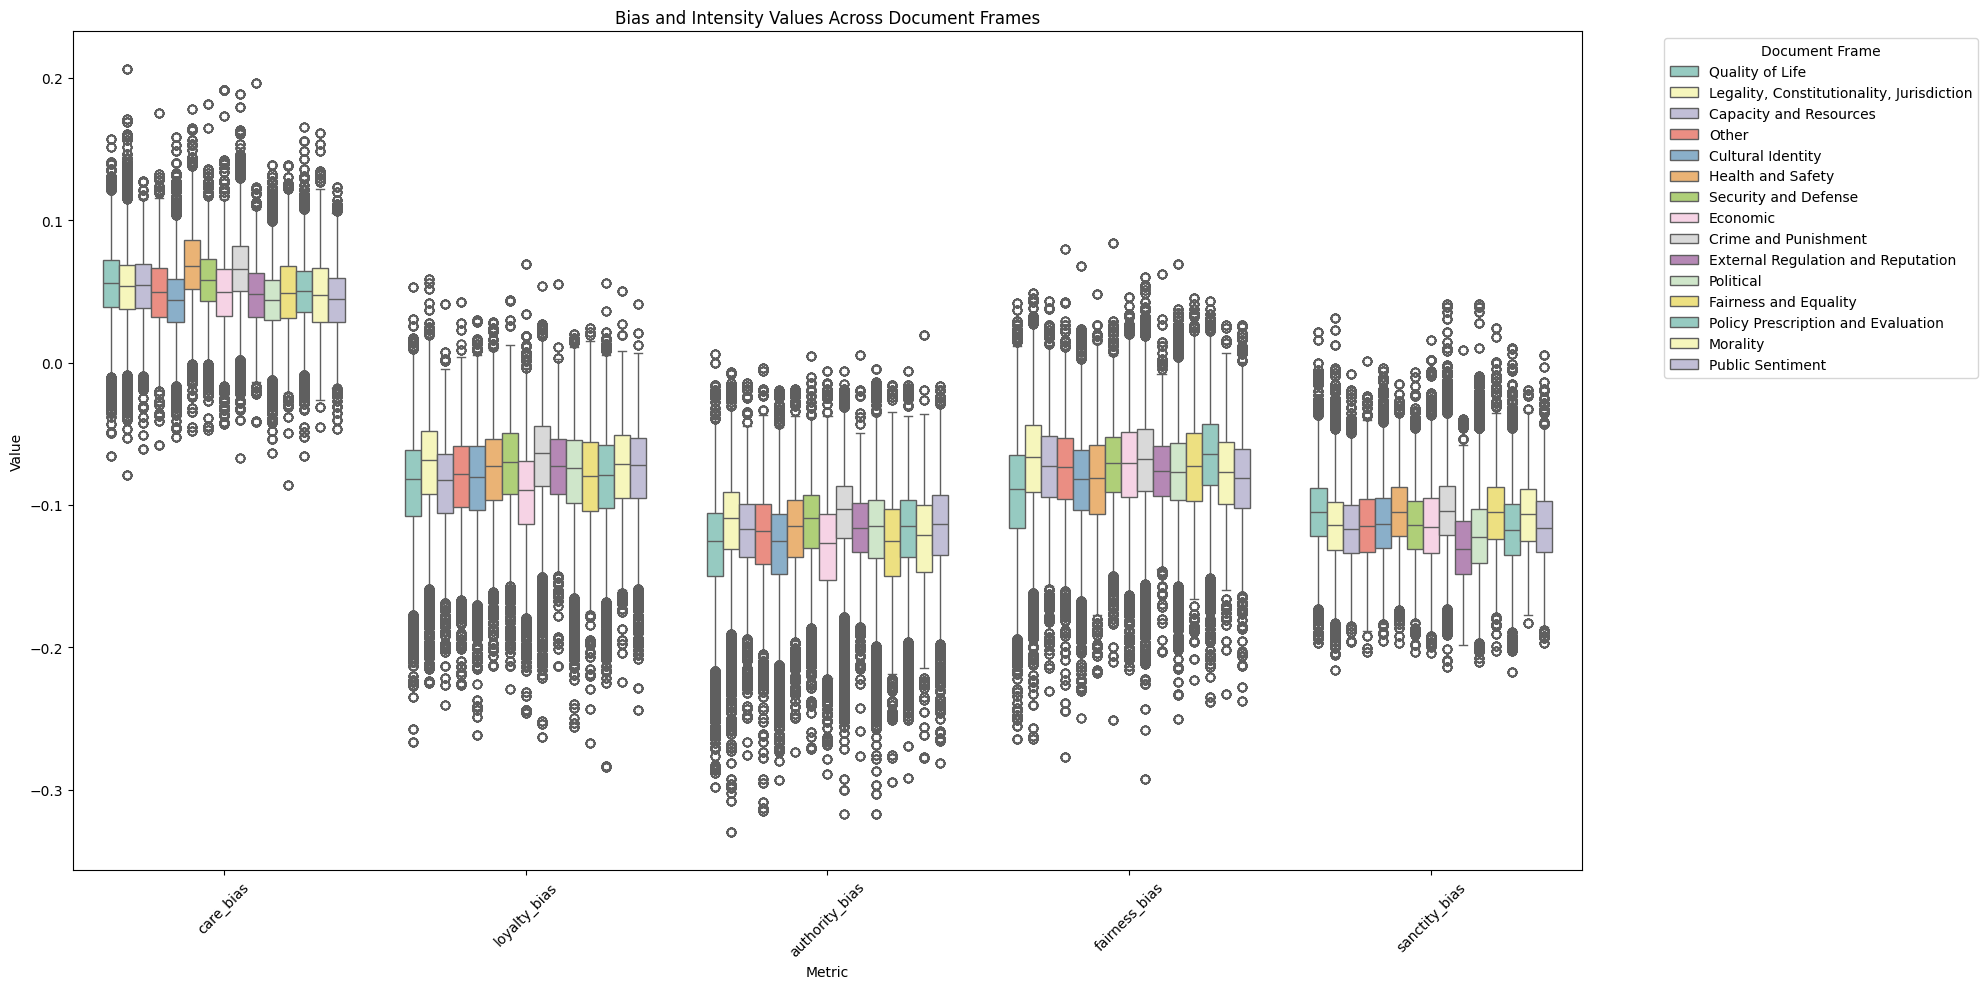

In [31]:
# Melting the DataFrame to have bias and intensity values in single columns with corresponding frame identifiers
melted_bias = df.melt(id_vars=['document_frame'], value_vars=bias_columns, 
                                var_name='Metric', value_name='Value')
melted_bias['Type'] = 'Bias'

# Combining bias and intensity data
combined_data = pd.concat([melted_bias])

# Plotting
plt.figure(figsize=(20, 10))
sns.boxplot(x='Metric', y='Value', hue='document_frame', data=combined_data, palette='Set3')
plt.title('Bias and Intensity Values Across Document Frames')
plt.xticks(rotation=45)
plt.legend(title='Document Frame', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


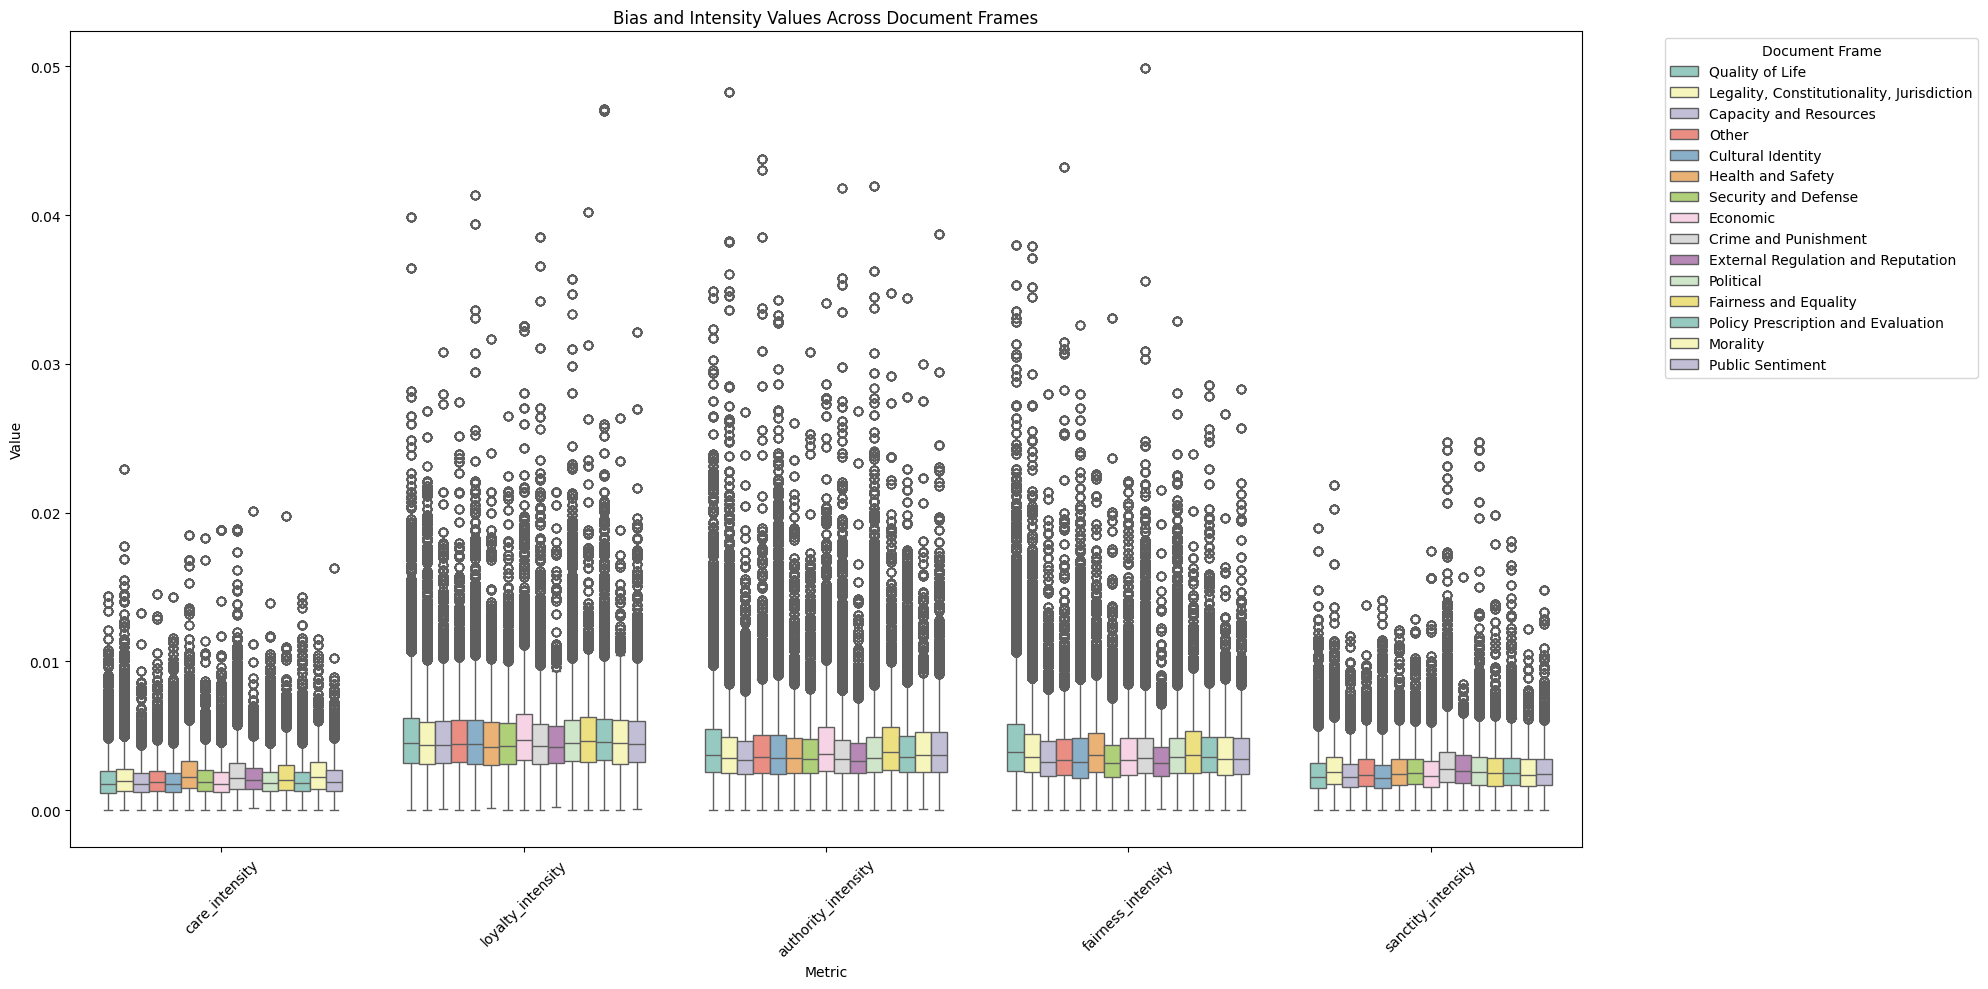

In [32]:
# Melting the DataFrame to have bias and intensity values in single columns with corresponding frame identifiers
melted_intensity = df.melt(id_vars=['document_frame'], value_vars=intensity_columns, 
                                     var_name='Metric', value_name='Value')
melted_intensity['Type'] = 'Intensity'

# Combining bias and intensity data
combined_data = pd.concat([melted_intensity])

# Plotting
plt.figure(figsize=(20, 10))
sns.boxplot(x='Metric', y='Value', hue='document_frame', data=combined_data, palette='Set3')
plt.title('Bias and Intensity Values Across Document Frames')
plt.xticks(rotation=45)
plt.legend(title='Document Frame', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Example plot for single foundation (bias)

C:\Users\elias\AppData\Local\Temp\ipykernel_18860\3095761594.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='document_frame', y='care_bias', data=df, palette='Set2')


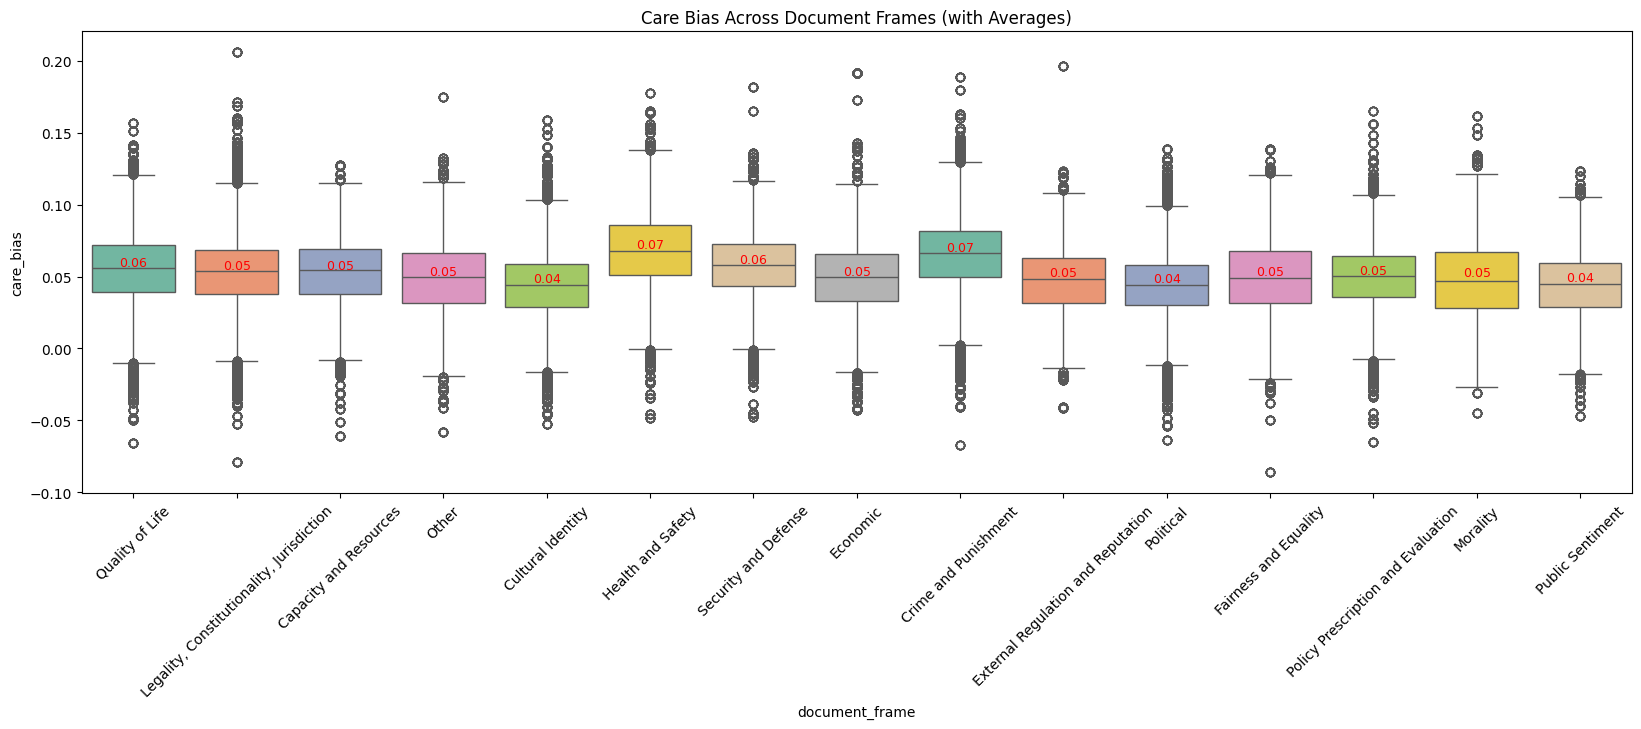

In [33]:
# Calculating the mean value of 'care_bias' for each document frame
means = df.groupby('document_frame')['care_bias'].mean().reset_index()

# Plotting
plt.figure(figsize=(20, 6))
ax = sns.boxplot(x='document_frame', y='care_bias', data=df, palette='Set2')
plt.title('Care Bias Across Document Frames (with Averages)')

# Annotating each box with the mean value
for i, frame in enumerate(ax.get_xticklabels()):
    frame = frame.get_text()
    mean_val = means.loc[means['document_frame'] == frame, 'care_bias'].values[0]
    plt.text(i, mean_val, f'{mean_val:.2f}', fontsize=9, ha='center', va='bottom', color='red')

plt.xticks(rotation=45)
plt.show()


# Example plot for a single foundation with bias on the x-axis and intensity on the y-axis

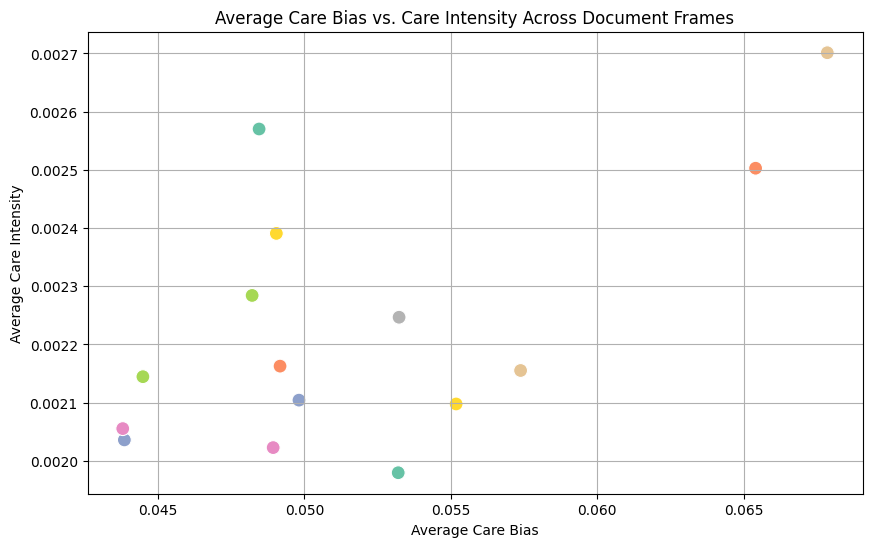

In [34]:
# Calculating the average 'care_bias' and 'care_intensity' for each document frame
frame_averages = df.groupby('document_frame').agg({'care_bias': 'mean', 'care_intensity': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='care_bias', y='care_intensity', data=frame_averages, hue='document_frame', palette='Set2', s=100, legend=False)
plt.title('Average Care Bias vs. Care Intensity Across Document Frames')
plt.xlabel('Average Care Bias')
plt.ylabel('Average Care Intensity')
plt.grid(True)
plt.show()

In [35]:
document_frames = ['Quality of Life', 'Economic', 'Health and Safety', 'Morality', 'Fairness and Equality']

def remove_outliers_fixed_distance(group, max_distance=0.5):
    # Calculate the mean for care_bias and care_intensity
    care_bias_mean = group['care_bias'].mean()
    care_intensity_mean = group['care_intensity'].mean()
    
    # Calculate the absolute difference from the mean
    group['bias_diff'] = (group['care_bias'] - care_bias_mean).abs()
    group['intensity_diff'] = (group['care_intensity'] - care_intensity_mean).abs()
    
    # Filter out rows where the difference is greater than the max_distance
    filtered_group = group[(group['bias_diff'] <= max_distance) & 
                           (group['intensity_diff'] <= max_distance)]
    
    # Drop the temporary columns
    filtered_group = filtered_group.drop(columns=['bias_diff', 'intensity_diff'])
    
    return filtered_group


# Apply the function to remove outliers for each frame individually and reset the index
filtered_df = df.groupby('document_frame').apply(remove_outliers_fixed_distance, max_distance=0.005).reset_index(drop=True)

# Now calculate the averages after filtering for the KDE plots
filtered_averages = filtered_df.groupby('document_frame').agg({'care_bias': 'mean', 'care_intensity': 'mean'}).reset_index()

filtered_df.shape, filtered_df.columns

((147995, 12),
 Index(['article_id', 'document_frame', 'care_bias', 'care_intensity',
        'loyalty_bias', 'loyalty_intensity', 'authority_bias',
        'authority_intensity', 'fairness_bias', 'fairness_intensity',
        'sanctity_bias', 'sanctity_intensity'],
       dtype='object'))

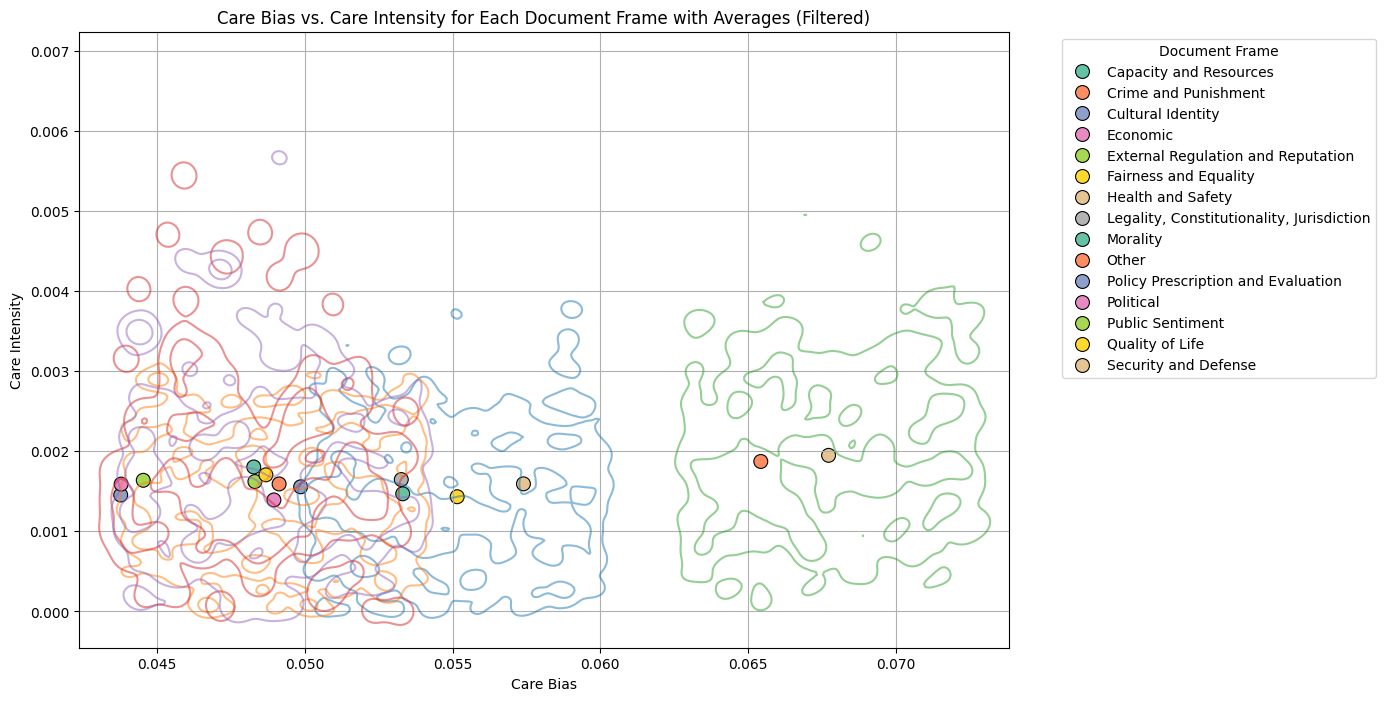

In [36]:
# Plotting the filtered data with averages
plt.figure(figsize=(12, 8))


# Scatter plot for the averages
sns.scatterplot(data=filtered_averages, x='care_bias', y='care_intensity', 
                hue='document_frame', palette='Set2', s=100, legend='brief', edgecolor='k')

# KDE plot for the distribution of filtered points, avoiding outliers
for frame in document_frames:
    subset = filtered_df[filtered_df['document_frame'] == frame]
    sns.kdeplot(x=subset['care_bias'], y=subset['care_intensity'], 
                bw_adjust=0.5, levels=3, alpha=0.5, thresh=0.1, label=frame)

# Finalizing the plot
plt.title('Care Bias vs. Care Intensity for Each Document Frame with Averages (Filtered)')
plt.xlabel('Care Bias')
plt.ylabel('Care Intensity')
plt.legend(title='Document Frame', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.show()